### import dependencies

In [1]:
import h5py
import numpy as np
import pandas as pd
from tkinter import *
from tkinter import filedialog
from tqdm import notebook
import matplotlib.pyplot as plt


### gui pop-up for loading multiple h5 files at once

In [2]:
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
h5_files = filedialog.askopenfilename(multiple=True, title='load facemap h5')

%gui tk

2023-02-09 22:29:33.187 python[25938:877593] +[CATransaction synchronize] called within transaction


### reorganize h5 format into dataframe

In [3]:
# initialize a list for storing all dataframes
data_dicts = []
selected_fnames = [h5_files[i].rpartition("/")[2] for i in range(len(h5_files))]
# for each h5 file you uploaded
for f, h5_file in enumerate(h5_files):
    print(50*'=')
    print(f'working on file {selected_fnames[f]}...')
    h5_df = h5py.File(h5_file, 'r')
    # create a dictionary for organization
    data_dict_bps = dict()
    # iterate through body parts, total was 15 keypoints
    keypoint_num = len(h5_df['Facemap'].keys())
    print(50*'-')
    print(f'going through all {keypoint_num} keypoints...')
    for bodypart in notebook.tqdm(h5_df['Facemap'].keys()):
        # iterate through frames
        data_dict_bp = dict()
        for frame in notebook.tqdm(range(len(h5_df['Facemap'][bodypart]['x']))):
            data_dict_bp[frame] = {'frame': frame,
                                'key': bodypart,
                                'x': h5_df['Facemap'][bodypart]['x'][frame],
                                'y': h5_df['Facemap'][bodypart]['y'][frame],
                                'likelihood': h5_df['Facemap'][bodypart]['likelihood'][frame]}
        data_dict_bps[bodypart] = data_dict_bp
    # convert into dataframe for future use
    data_dicts.append(data_dict_bps)

working on file W4_020123_FacemapPose.h5...
--------------------------------------------------
going through all 15 keypoints...


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

  0%|          | 0/401557 [00:00<?, ?it/s]

### save dataframes as csv

In [ ]:
for f in range(len(data_dicts)):
    for bodypart in notebook.tqdm(h5_df['Facemap'].keys()):
        keypoint_df = pd.DataFrame(data=data_dicts[f][bodypart])
        keypoint_df.to_csv(f'../temp/{selected_fnames[f]}-{bodypart}.csv', header=None)

  0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
disp_bps = dict()
for bodypart in notebook.tqdm(h5_df['Facemap'].keys()):
    data_len = len(data_dicts[0][bodypart])
    disp_bp = []
    for r in range(data_len-1):
        disp_bp.append(
            np.linalg.norm(
                np.array([data_dicts[0][bodypart][r+1]['x'],
                          data_dicts[0][bodypart][r+1]['y']]) -
                np.array([data_dicts[0][bodypart][r]['x'],
                          data_dicts[0][bodypart][r]['y']])
            )
        )
    disp_bps[bodypart] = np.hstack(disp_bp)

  0%|          | 0/15 [00:00<?, ?it/s]

### plot displacement per keypoint

In [7]:
# list out all keypoints
disp_bps.keys()

dict_keys(['eye(back)', 'eye(bottom)', 'eye(front)', 'eye(top)', 'lowerlip', 'mouth', 'nose(bottom)', 'nose(r)', 'nose(tip)', 'nose(top)', 'nosebridge', 'paw', 'whisker(I)', 'whisker(II)', 'whisker(III)'])

Text(0.5, 0, 'frame #')

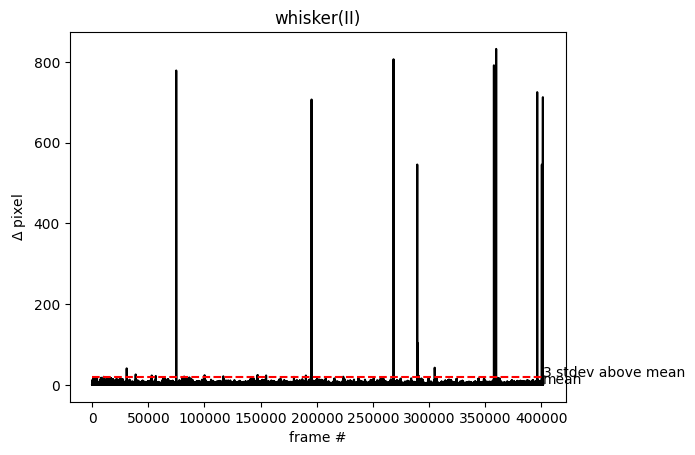

Text(0.5, 0, 'frame #')

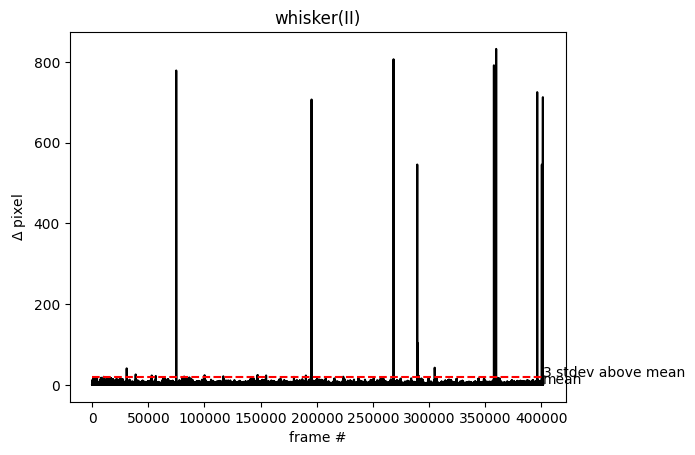

In [14]:
# select a file index
file_idx = 0
# create a 3x5 keypoint plot
rows = 3
cols = 5
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(16, 14))
for row in range(rows):
    for col in range(cols):
        mean_disp = np.mean(disp_bps[disp_bps.keys()[count]])
        std_disp = np.std(disp_bps[disp_bps.keys()[count]])
        ax[row, col].set_title(disp_bps.keys()[count])
        ax[row, col].plot(disp_bps[disp_bps.keys()[count]], color='k')
        ax[row, col].hlines(mean_disp, 0, len(disp_bps[disp_bps.keys()[count]]), ls='--', color='k')
        ax[row, col].text(len(disp_bps[disp_bps.keys()[count]]), (mean_disp)*1, 'mean')
        ax[row, col].hlines(mean_disp+3*std_disp, 0, len(disp_bps[disp_bps.keys()[count]]), ls='--', color='r')
        ax[row, col].text(len(disp_bps[disp_bps.keys()[count]]), (mean_disp+3*std_disp)*1, '3 stdev above mean')
        ax[row, col].set_ylabel('$\Delta$ pixel')
        ax[row, col].set_xlabel('frame #')
        count += 1
